In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
usage = pd.read_csv('electricity_usage.csv')
usage

,Bulan,Penggunaan
0,1,320
1,2,290
2,3,310
3,4,330
4,5,350
5,6,370
6,7,400
7,8,390
8,9,360
9,10,340


In [11]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Bulan       24 non-null     int64
 1   Penggunaan  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [12]:
usage.describe()

,Bulan,Penggunaan
count,24.000000,24.000000
mean,12.500000,354.583333
std,7.071068,35.750241
min,1.000000,290.000000
25%,6.750000,330.000000
50%,12.500000,350.000000
75%,18.250000,382.500000
max,24.000000,420.000000


In [18]:
max = usage[usage['Penggunaan'] == usage['Penggunaan'].max()]
max

,Bulan,Penggunaan
18,19,420


In [16]:
min = usage[usage['Penggunaan'] == usage['Penggunaan'].min()]
min

,Bulan,Penggunaan
1,2,290


array([[<Axes: title={'center': 'Bulan'}>,
        <Axes: title={'center': 'Penggunaan'}>]], dtype=object)

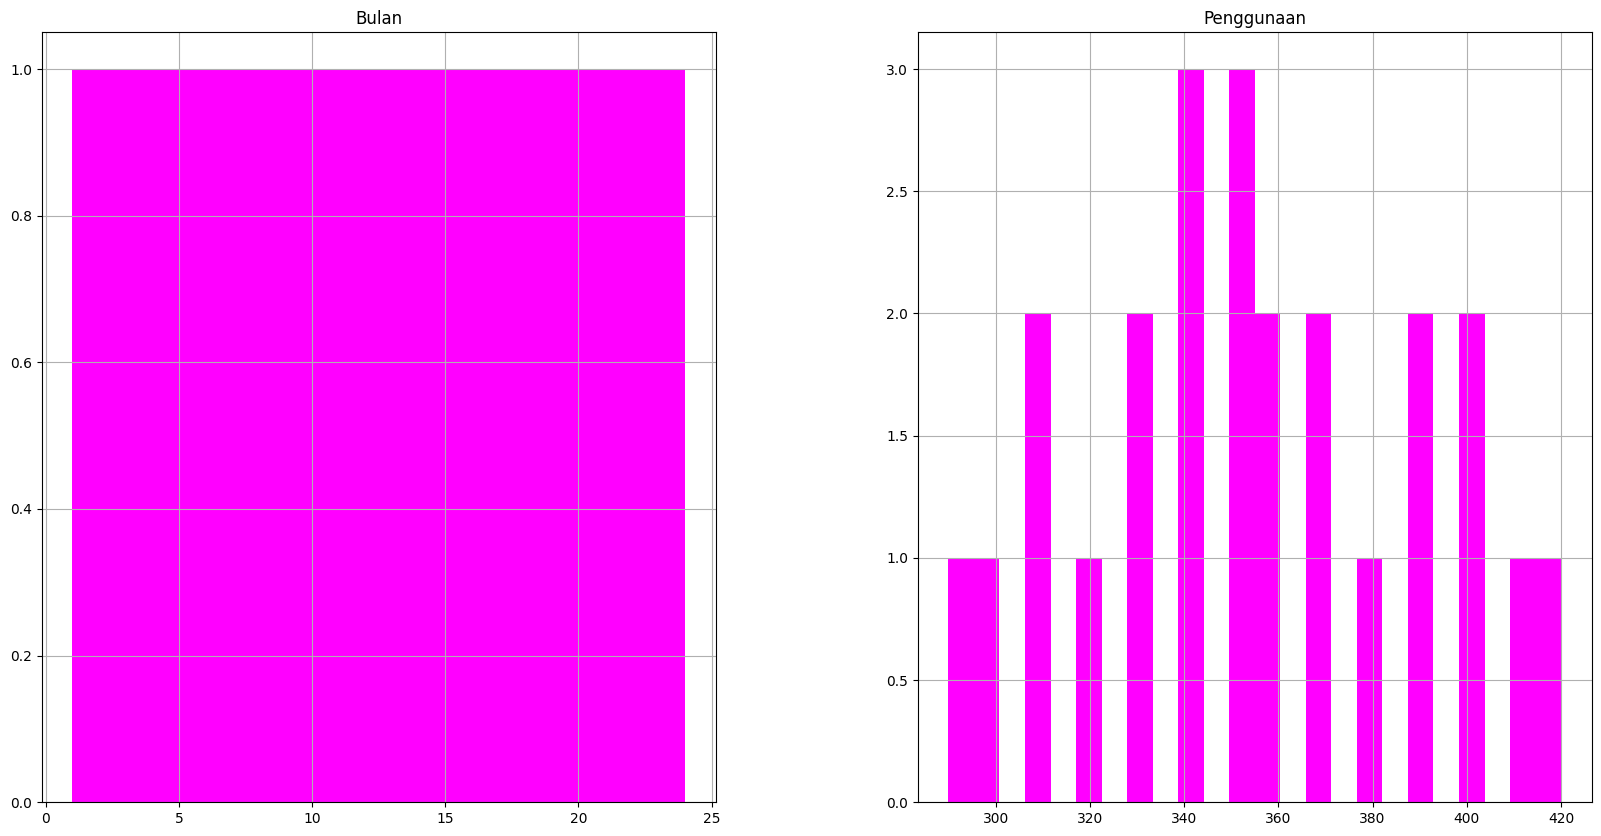

In [22]:
usage.hist(bins = 24, figsize=(20,10), color = 'magenta')

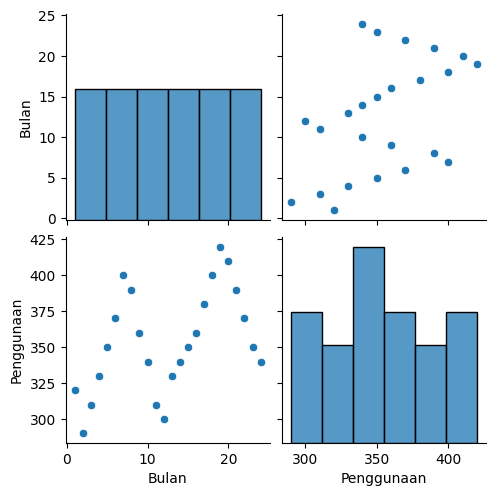

In [23]:
sns.pairplot(usage)

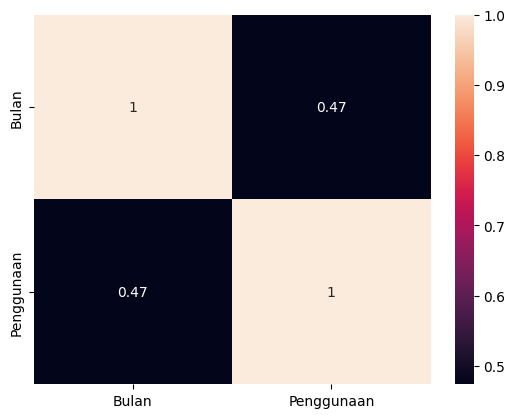

In [24]:
matrix = usage.corr()
sns.heatmap(matrix, annot = True)
plt.show()

<Axes: xlabel='Bulan', ylabel='Penggunaan'>

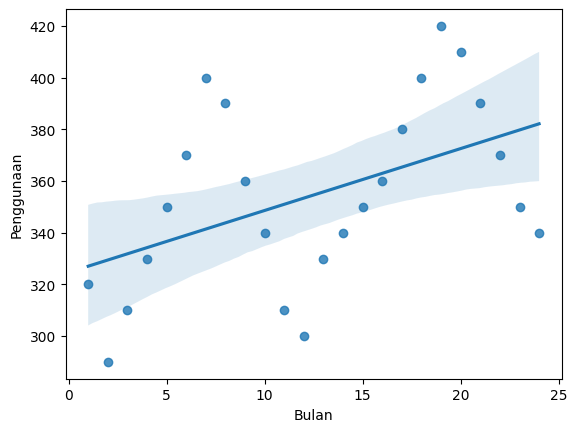

In [25]:
sns.regplot(x =  'Bulan', y = 'Penggunaan', data = usage)

In [30]:
x = usage[['Bulan']]
y = usage[['Penggunaan']]

    Bulan
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24


In [35]:
x = np.array(x)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=72)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression(fit_intercept = True)
reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse

np.float64(838.8529167507919)

In [44]:
print('Linear Model Coefficient (m): ', reg.coef_)
print('Linear Model Coefficient (b): ', reg.intercept_)

Linear Model Coefficient (m):  [[2.8629883]]
Linear Model Coefficient (b):  [314.84431942]


In [45]:
y_pred

array([[363.51512052],
       [334.88523752],
       [343.47420242],
       [326.29627262],
       [377.83006202],
       [329.15926092]])

Text(0.5, 1.0, 'Usage growth per month of using electricity')

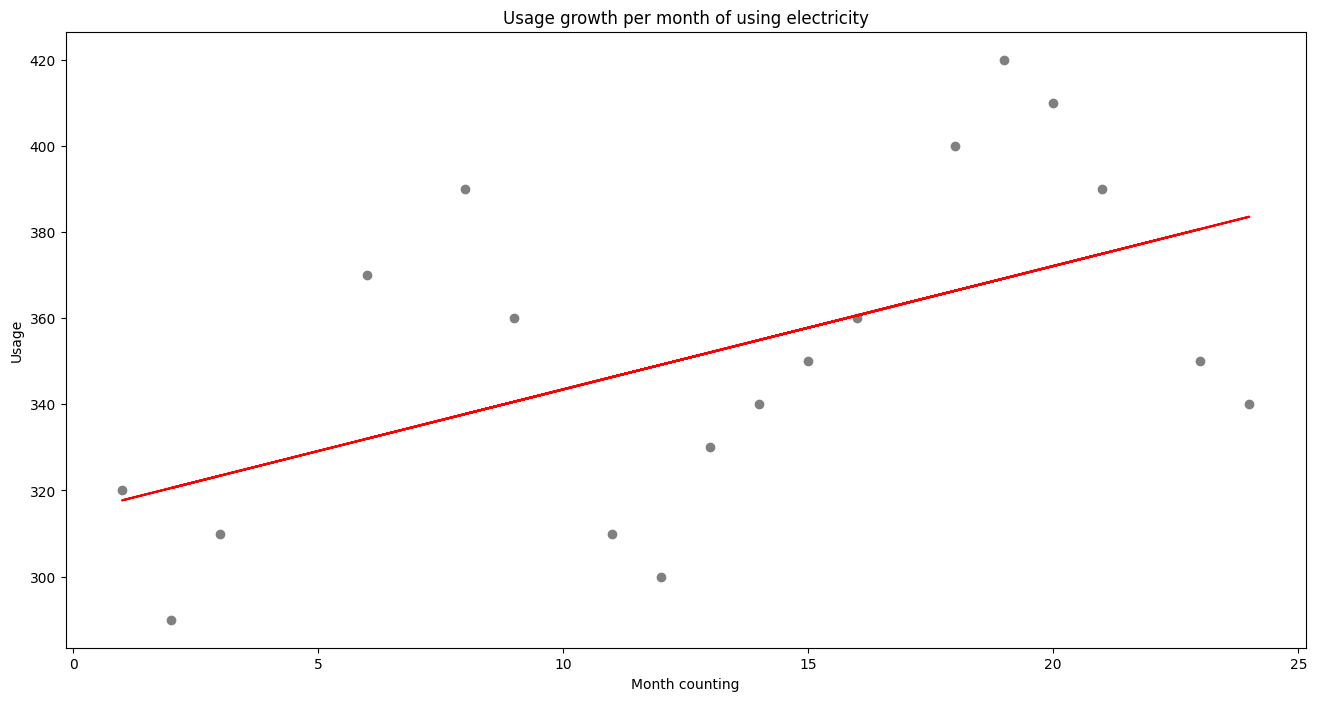

In [46]:
plt.figure(figsize=(16,8))
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, reg.predict(x_train), color = 'red')
plt.ylabel('Usage')
plt.xlabel('Month counting')
plt.title('Usage growth per month of using electricity')

In [47]:
new_value = [[5.0]]
new_prediction = reg.predict(new_value)
new_prediction

array([[329.15926092]])

In [48]:
import joblib

model_file = open("elecusage.pkl","wb")
joblib.dump(reg,model_file)
model_file.close()